In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

In [10]:
data=pd.read_csv(r"C:\Users\JOHAN\Desktop\articulos_ml.csv",parse_dates=True,sep=";")

In [11]:
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [13]:
data.isnull().sum(axis=0)

Title              0
url               39
Word count         0
# of Links         0
# of comments     32
# Images video     0
Elapsed days       0
# Shares           0
dtype: int64

In [14]:
data.fillna(0,inplace=True)

In [15]:
data=data.iloc[:,3:]

In [17]:
X=data.values


In [19]:
#eleccion del algoritmo
from sklearn.cluster import KMeans

In [22]:
def build_model(data):
    rangos=range(1,21)
    scores=[KMeans(n_clusters=N).fit(data).score(X) for N in rangos]
    plt.plot(rangos,np.array(scores)[:,np.newaxis])
    plt.show()

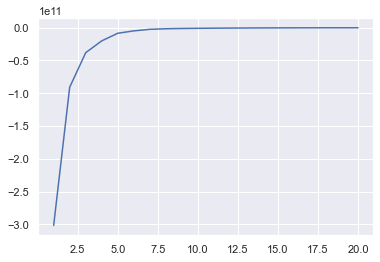

In [23]:
build_model(X)

In [24]:
#concluimos que el modelo obtiene mejores resultados con 7 clusters
kmeans=KMeans(n_clusters=7)
kmeans.fit(X);

In [25]:
kmeans.labels_

array([2, 5, 4, 2, 2, 5, 2, 6, 0, 4, 6, 3, 5, 4, 4, 0, 0, 1, 4, 0, 0, 0,
       4, 5, 1, 5, 1, 5, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 0, 4, 0, 0, 1, 1, 4, 0, 6, 5, 1,
       5, 1, 0, 5, 4, 0, 1, 4, 5, 5, 5, 1, 5, 5, 6, 5, 4, 1, 5, 0, 0, 0,
       4, 4, 4, 5, 5, 5, 0, 5, 1, 4, 1, 4, 1, 1, 5, 4, 4, 5, 4, 1, 0, 1,
       0, 5, 0, 1, 5, 5, 5, 5, 4, 5, 5, 1, 6, 5, 0, 5, 4, 5, 0, 1, 1, 1,
       5, 1, 1, 5, 0, 4, 1])

In [26]:
kmeans.cluster_centers_

array([[4.31818182e+00, 5.00000000e+00, 3.04545455e+00, 9.21363636e+01,
        5.43980000e+04],
       [7.52173913e+00, 6.00000000e+00, 3.92753623e+00, 1.18391304e+02,
        3.09075362e+03],
       [1.51250000e+02, 3.35000000e+01, 2.50000000e+00, 1.00750000e+02,
        2.00000000e+05],
       [4.00000000e+00, 0.00000000e+00, 1.50000000e+01, 1.00200000e+03,
        3.50000000e+05],
       [4.54166667e+00, 7.08333333e+00, 3.25000000e+00, 5.60416667e+01,
        3.42197083e+04],
       [6.05555556e+00, 5.25000000e+00, 3.77777778e+00, 6.64444444e+01,
        1.95105556e+04],
       [3.60000000e+00, 2.32000000e+01, 2.80000000e+00, 9.20000000e+01,
        8.32026000e+04]])

In [29]:
array=np.unique(kmeans.labels_,return_counts=True)

In [35]:
result=pd.DataFrame({
    "Grupo":array[0]+1,
    "Cantidad":array[1]
}).set_index('Grupo')

In [36]:
result


,Cantidad
Grupo,
1,22
2,69
3,4
4,1
5,24
6,36
7,5


In [37]:
import joblib
joblib.dump(kmeans,"model_kmeans_articulos.pkl")

['model_kmeans_articulos.pkl']